In [1]:
# required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# preprocessing libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# For feature selection
from mlxtend.feature_selection import SequentialFeatureSelector

# Random Forest
from sklearn.ensemble import RandomForestClassifier


# for ignoring any unwanted warning
import warnings
warnings.filterwarnings('ignore')

# set style for the plots
sns.set_theme(style="darkgrid")
sns.set_palette("Set2")

In [2]:
# importing the dataset
df = pd.read_csv('Churn_Modelling.csv')
df.head() # see the top 5 rows of the dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# checking the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Feature Engineering

In [4]:
# Here we don't need "RowNumber", "CustomerId" , "Surname" columns. 
# Let's remove them first

df.drop(["RowNumber", "CustomerId" , "Surname"], axis = 1, inplace = True)

In [5]:
# check the dataset
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Now let's encode the categorical variables. For this I'll use Label Encoder technique

In [6]:
l_enc = LabelEncoder()
df['Geography'] = l_enc.fit_transform(df['Geography'])
df['Gender'] = l_enc.fit_transform(df['Gender'])

Previously we've seen that there are some outliers in "age" & "CreditScore" columns. Since in this notebook we'll use treebase algorithm like "Decision Tree" or "Random Forest" and these algorithms are not affected by outliers so let's keep them as they are.

We also don't need to scale the data for the tree based algorithms. So let's more on to the next section which is Feature Selection

In [7]:
# Before Feature selection Let's seperate the inputs and targets.

x = df.drop('Exited', axis = 1).values # inputs
y = df['Exited'].values # target

print(x.shape, y.shape)

(10000, 10) (10000,)


In [8]:
# Now let's split the dataset into train & test set. This is because we'll apply feature selection only in train set
# and then apply the same features for the test set.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=41)

# checking shape of train & test set
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(8000, 10) (2000, 10) (8000,) (2000,)


### Feature Selection
For this notebook I'll use a Wrapper Method and in Wrapper method I'll consider Backward Elemination technique.

In [9]:
sfs = SequentialFeatureSelector(RandomForestClassifier(),
                               k_features= (3,10),
                               forward= False,
                               floating= False,
                               scoring='accuracy',
                               cv = 5) # creating instance

In [10]:
sfs.fit(x_train, y_train) # fitting the data

SequentialFeatureSelector(estimator=RandomForestClassifier(), forward=False,
                          k_features=(3, 10), scoring='accuracy')

In [11]:
sfs.k_feature_names_

('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

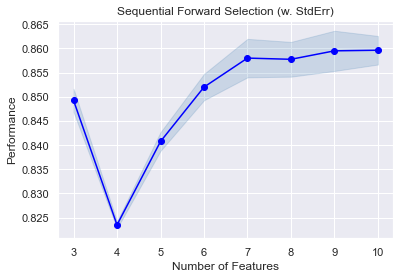

In [12]:
# let's visualize the perfomance of the features
from mlxtend.plotting import plot_sequential_feature_selection

fig1 = plot_sequential_feature_selection(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.show()

From the above plot we can say that all the predictors are important for this problem. Since with all the features the model got the highest performance. so we'll use all the features for our model.

In [13]:
# Finding optimum Feature index 
sfs.k_feature_idx_

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

In [14]:
# Now let's save the cleaned data into a new dataset having these feature and will perfrom ML 
df.to_csv('final_df.csv', index = False)

With this we've ended our Feature engineering & selection part. Next I'll perform Machine learning & Optimizing Machine learning algorithm.